In [5]:
import sys
sys.path.append("..")
from util.oneDTravelWave import oneDTravelWave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.io import savemat, loadmat

In [9]:
data = loadmat('../data/phase_field_oneD_experiment.mat')
x = np.squeeze(data['x'])
t = np.squeeze(data['t'])
phase_fields = data['usol']

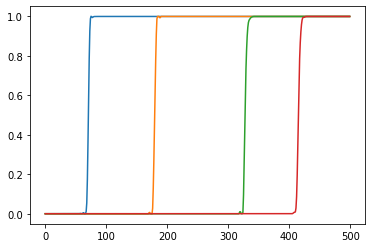

In [11]:
plt.plot(phase_fields[:,0])
plt.plot(phase_fields[:,20])
plt.plot(phase_fields[:,40])
plt.plot(phase_fields[:,60])

In [61]:
delta_x = x[1]-x[0]
num_time_step_between_frame = 50
delta_t_frame = t[1]-t[0]
predict_interval = len(phase_fields[0])-1

In [62]:
prediction = oneDTravelWave(phase_fields[:,0], predict_interval=predict_interval, gamma=50.07, m=-4.76*5,
                   ypsilon=0.47*5, num_time_step_between_frame=num_time_step_between_frame, delta_t_frame=delta_t_frame,delta_x=delta_x)
prediction = np.squeeze(prediction)

In [63]:
prediction.shape

(500, 64)

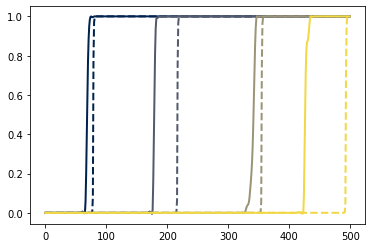

In [64]:
cmap = mpl.cm.cividis
step = 20
for i in range(0,predict_interval, step):
    plt.plot(prediction[:,i],linestyle='--',color=cmap(i / float(predict_interval)),linewidth=2)
    plt.plot(phase_fields[:,i+1],linestyle='-',color=cmap(i / float(predict_interval)),linewidth=2)
#plt.legend()